Visualize EDI

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [3]:
ds_pev = xr.open_dataset('G:/ERA5_reanalysis_data/Potential_evaporation_CUT_1980_2022.nc')
ds_e = xr.open_dataset('G:/ERA5_reanalysis_data/LAND_EVA_CUT_1980_1982.nc')

Define Function

In [4]:
def calculate_edi(E, PET):
    EDI = 1 - (E / PET)
    return EDI

Calculate EDI for the years 1980 and 1981 respectively, compute the annual average of EDI, and calculate the difference in EDI between the two years.

In [5]:
edi_1980 = calculate_edi(ds_e['e'].sel(time=slice('1980-01-01', '1980-12-31')),
                         ds_pev['pev'].sel(time=slice('1980-01-01', '1980-12-31')))
edi_1981 = calculate_edi(ds_e['e'].sel(time=slice('1981-01-01', '1981-12-31')),
                         ds_pev['pev'].sel(time=slice('1981-01-01', '1981-12-31')))

edi_avg_1980 = edi_1980.mean(dim='time')
edi_avg_1981 = edi_1981.mean(dim='time')

edi_trend = edi_avg_1981 - edi_avg_1980

Plotting 

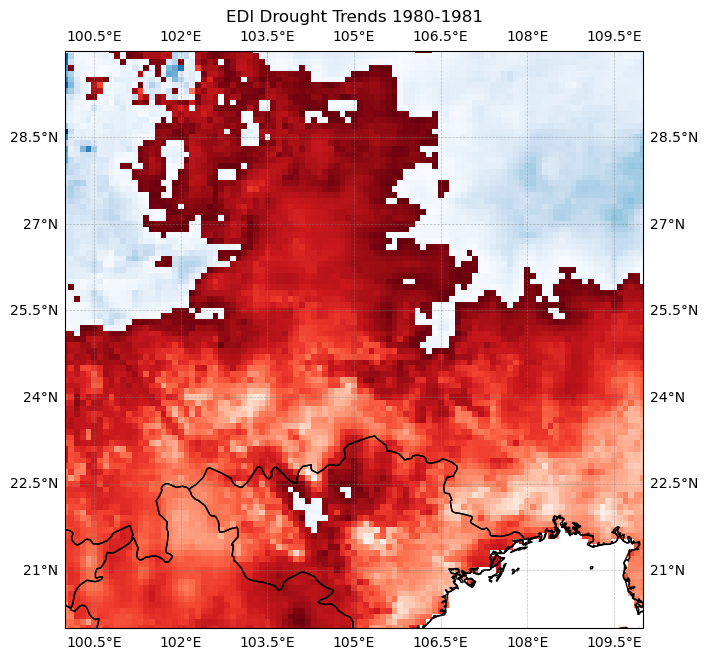

In [6]:
plt.figure(figsize=(15, 7.5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([100, 110, 20, 30], crs=ccrs.PlateCarree())

shp_path = 'G:/graduate_thesis/Chinamap/'
for geometry in shpreader.Reader(shp_path + "country1.shp").geometries():
    ax.add_geometries(geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='black')

edi_trend.where(edi_trend > 0).plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, cmap='Blues')
edi_trend.where(edi_trend < 0).plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, cmap='Reds')

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

ax.coastlines()
plt.title('EDI Drought Trends 1980-1981')
plt.show()